In [31]:
from dataset import Dataset
from models import Models

%load_ext autoreload
%autoreload 2 

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
path = 'Training/'
path_val = 'Validation/'
img_w = 160
img_h = 160
n_labels = 2 #6
model_base_name = 'unet160--'

dataset = Dataset(path, img_w, img_h, n_labels)
x, y = dataset.createDataset(augmentation=True, prob1=False)
dataset = Dataset(path_val, img_w, img_h, n_labels)
x_val, y_val = dataset.createDataset(augmentation=False, prob1=False)

NameError: name 'invert_img' is not defined

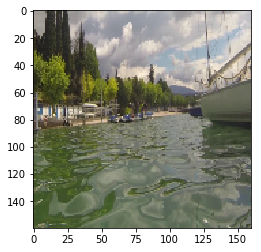

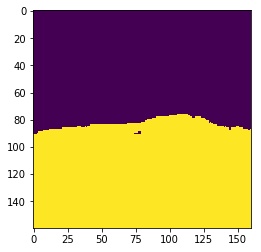

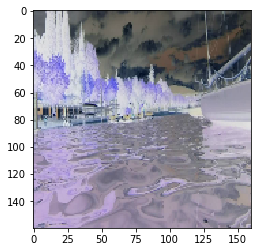

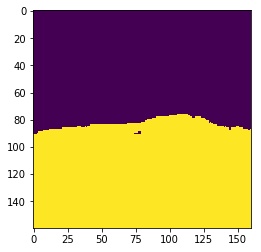

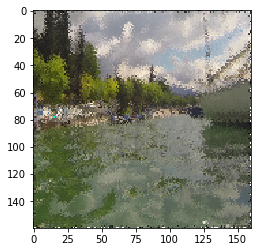

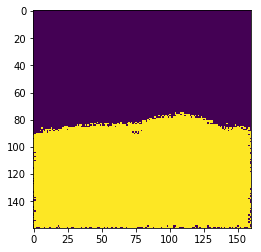

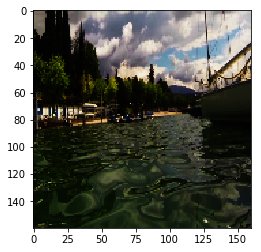

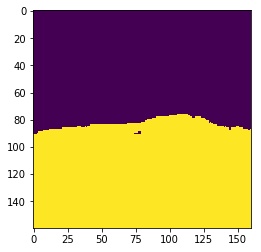

In [107]:
from imgaug import augmenters as iaa
import random

image=x[100]
label=y[100]

dataset.plot_image(image)
dataset.plot_binary_image(label)

def invert_img(image, label):
    invert=iaa.Invert(1, per_channel=True)
    inverted_img=invert.augment_image(image)
    
    return inverted_img, label

def sigmoid_cont_img(image, label, gain_max, gain_min, cutoff_max, cutoff_min):
    gain= random.uniform(gain_max, gain_min)
    cutoff= random.uniform(cutoff_max, cutoff_min)
    sigmoid_cont= iaa.SigmoidContrast(gain=gain, cutoff=cutoff)
    
    image = sigmoid_cont.augment_image(image)
    
    return image, label

inverted_img, inverted_label = invert_img(image, label)
sigmoid_img, sigmoid_label = sigmoid_cont_img(image, label, 9.0, 11.0, 0.0, 0.70)



dataset.plot_image(inverted_img)
dataset.plot_binary_image(inverted_label)
dataset.plot_image(elast_img)
dataset.plot_binary_image(elast_label)
dataset.plot_image(sigmoid_img)
dataset.plot_binary_image(sigmoid_label)

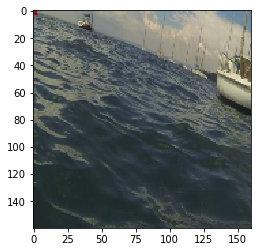

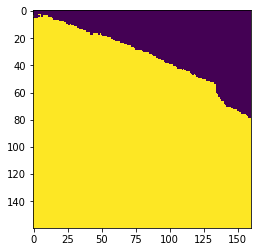

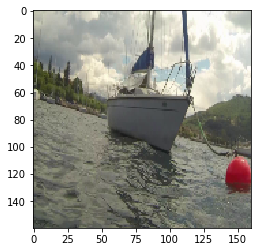

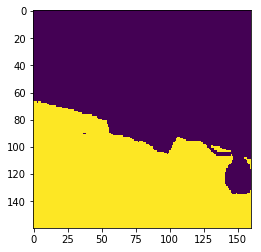

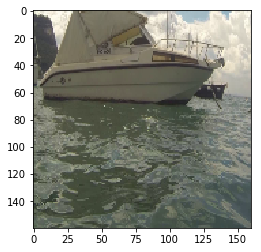

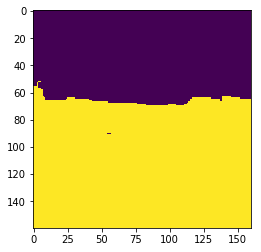

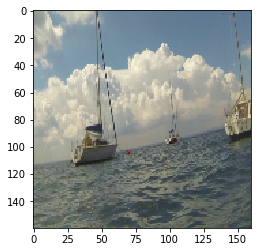

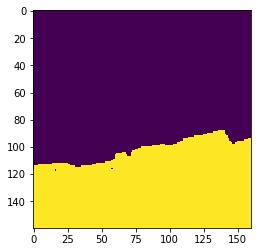

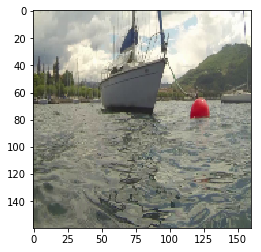

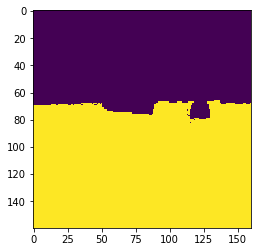

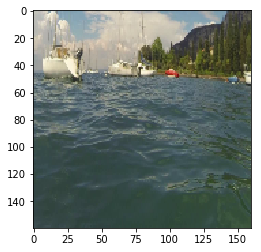

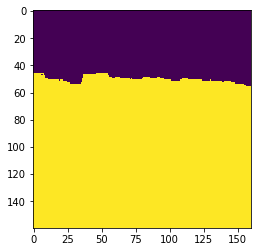

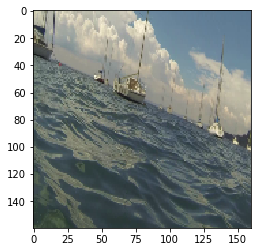

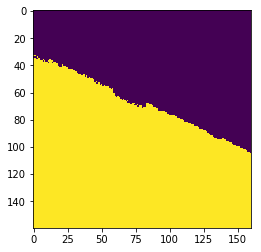

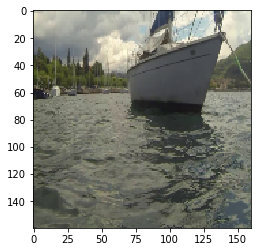

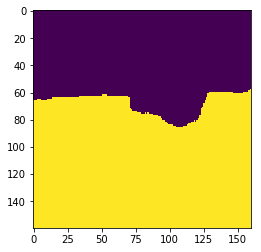

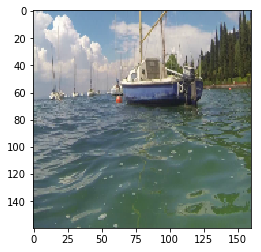

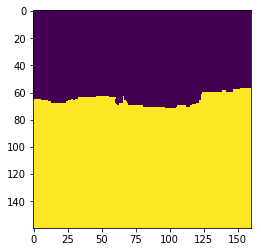

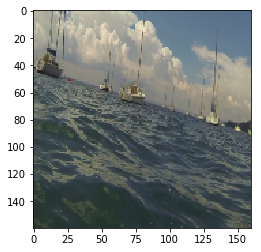

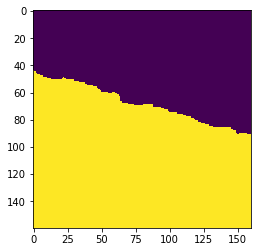

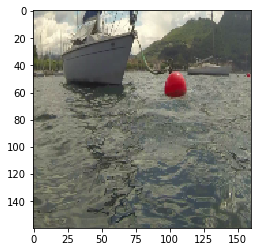

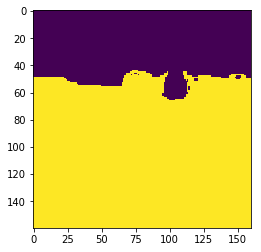

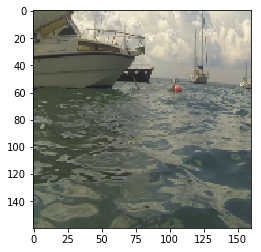

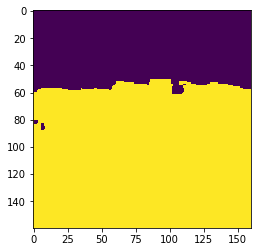

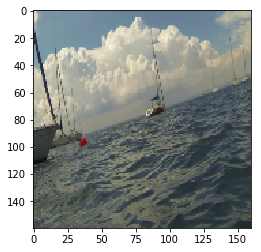

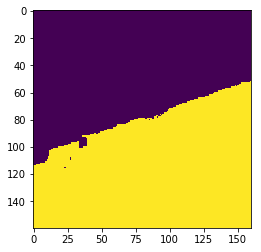

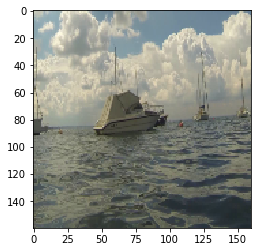

KeyboardInterrupt: 

In [67]:
for i, image, label in zip(range(30),x,y):
    if i==30: break
    Dataset.plot_image(image)
    Dataset.plot_binary_image(label)

In [ ]:
from losses import *

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model

losses=[dice_coef_loss]#['binary_crossentropy', 'mse','mae', dice_coef_loss]
losses_name=['dice_coef_loss']#['binary_crossentropy', 'mse', 'mae', 'dice_coef_loss']
metrics=['binary_crossentropy','mse','mae',  dice_coef]

In [ ]:
batch_size=32
epochs=80
input_shape = (img_h, img_w, 3)
nb_classes = n_labels

model_class= Models()
path= 'models_saved/'

for name_loss, loss in zip(losses_name,losses):

    model1= model_class.get_unet_model_1(input_shape, nb_classes, loss, metrics)
    model2= model_class.get_unet_model_2(input_shape, nb_classes, loss, metrics)
    model3= model_class.get_unet_model_3(input_shape, nb_classes, loss, metrics)
    model4= model_class.get_unet_model_4(input_shape, nb_classes, loss, metrics)
    model5= model_class.get_unet_model_5(input_shape, nb_classes, loss, metrics)
    model6= model_class.get_unet_model_6(input_shape, nb_classes, loss, metrics)

    models= [model1, model2, model3, model4, model5, model6]
    models_name= ['small', 'smallBN', 'medium', 'mediumBN', 'large', 'largeBN']
    
    for name_model, model in zip(models_name, models):
        
        model_name=path+model_base_name+name_model+'--'+name_loss
        
        model_checkpoint = ModelCheckpoint(model_name, monitor='val_loss', save_best_only=True)
        earlyStopping= EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,verbose=0, mode='min')
        
        history = model.fit(x=x,y=y,batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[model_checkpoint, earlyStopping],validation_data=(x_val, y_val),shuffle=True )
        model_class.save_history(path+model_base_name+'history--'+name_model+'--'+name_loss, history)
        
    